## Importing all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

C:\Python\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
bank_df=pd.read_csv('bank_marketing_part1_Data.csv') 

In [3]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.describe() 

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bank_df.duplicated().sum()

0

In [7]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

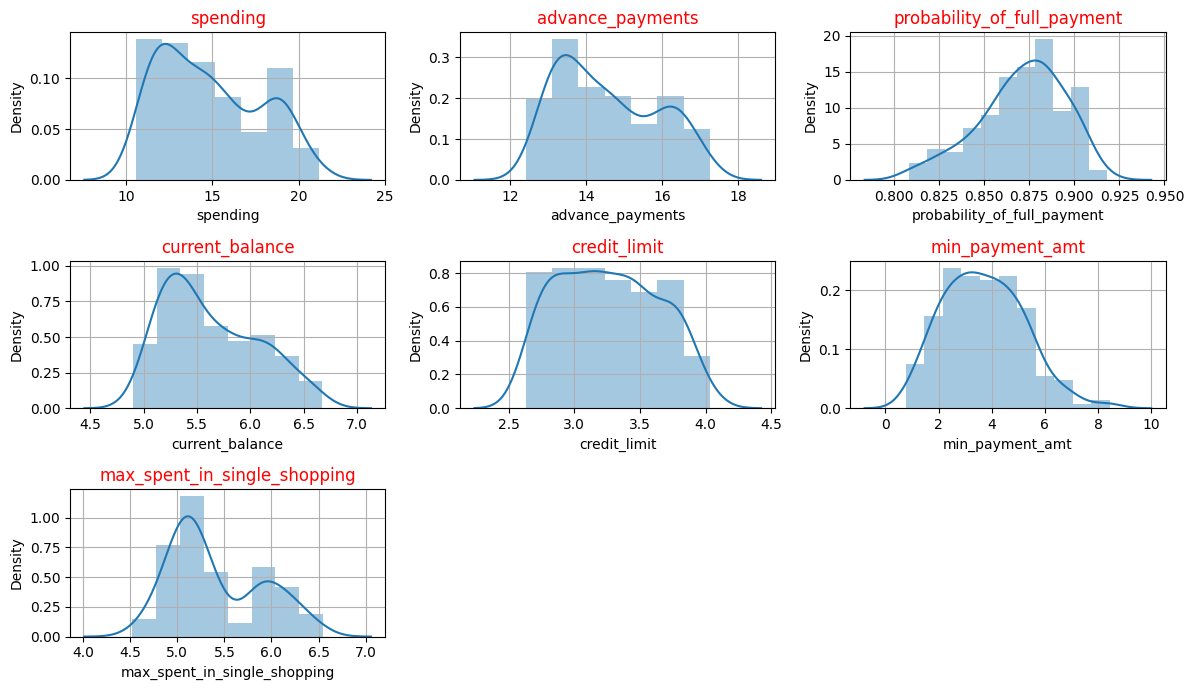

In [8]:
data_plot=bank_df[['spending', 'advance_payments', 'probability_of_full_payment','current_balance', 'credit_limit', 'min_payment_amt','max_spent_in_single_shopping']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

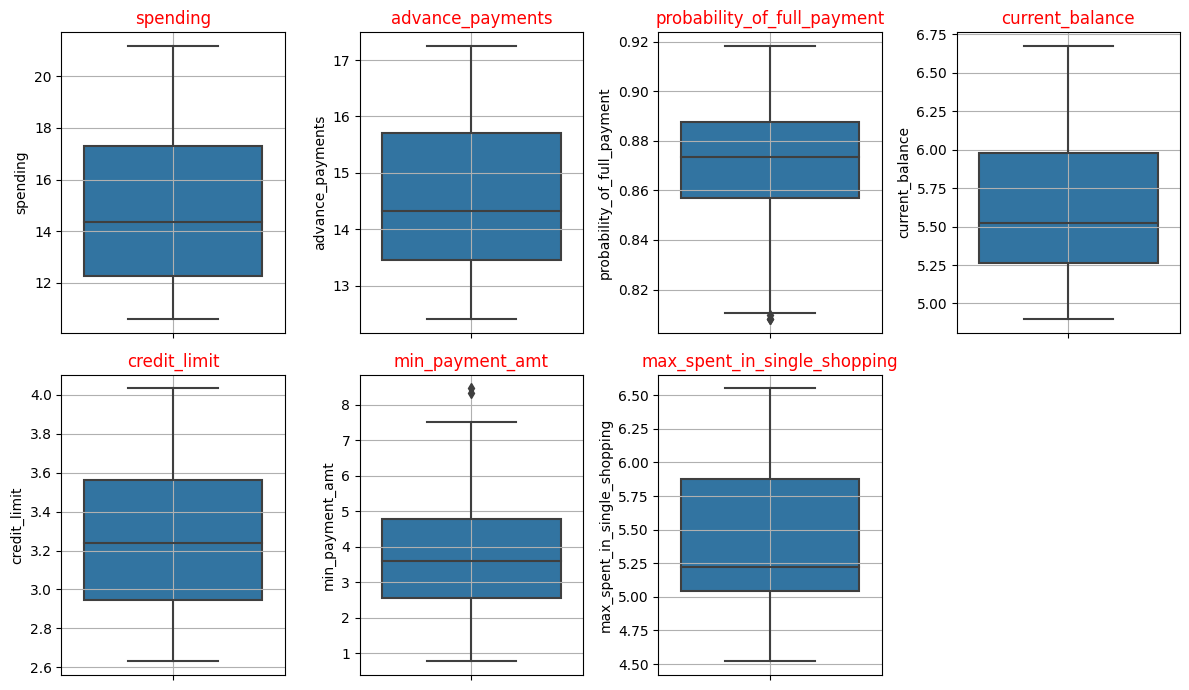

In [9]:
data_plot=bank_df[['spending', 'advance_payments', 'probability_of_full_payment','current_balance', 'credit_limit', 'min_payment_amt','max_spent_in_single_shopping']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

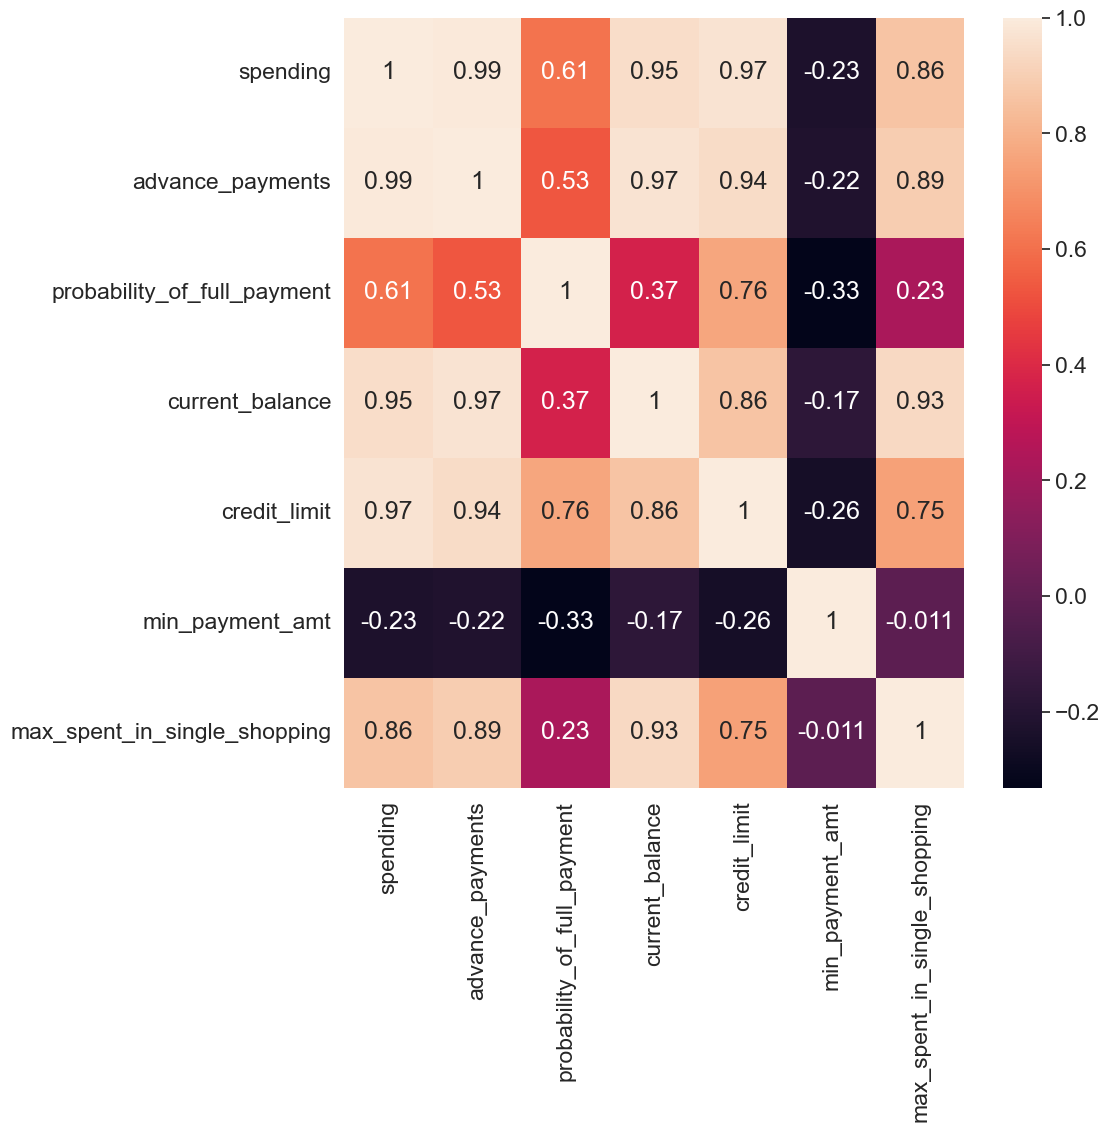

In [10]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
corre=bank_df.corr()
sns.heatmap(corre,annot=True)
plt.show()

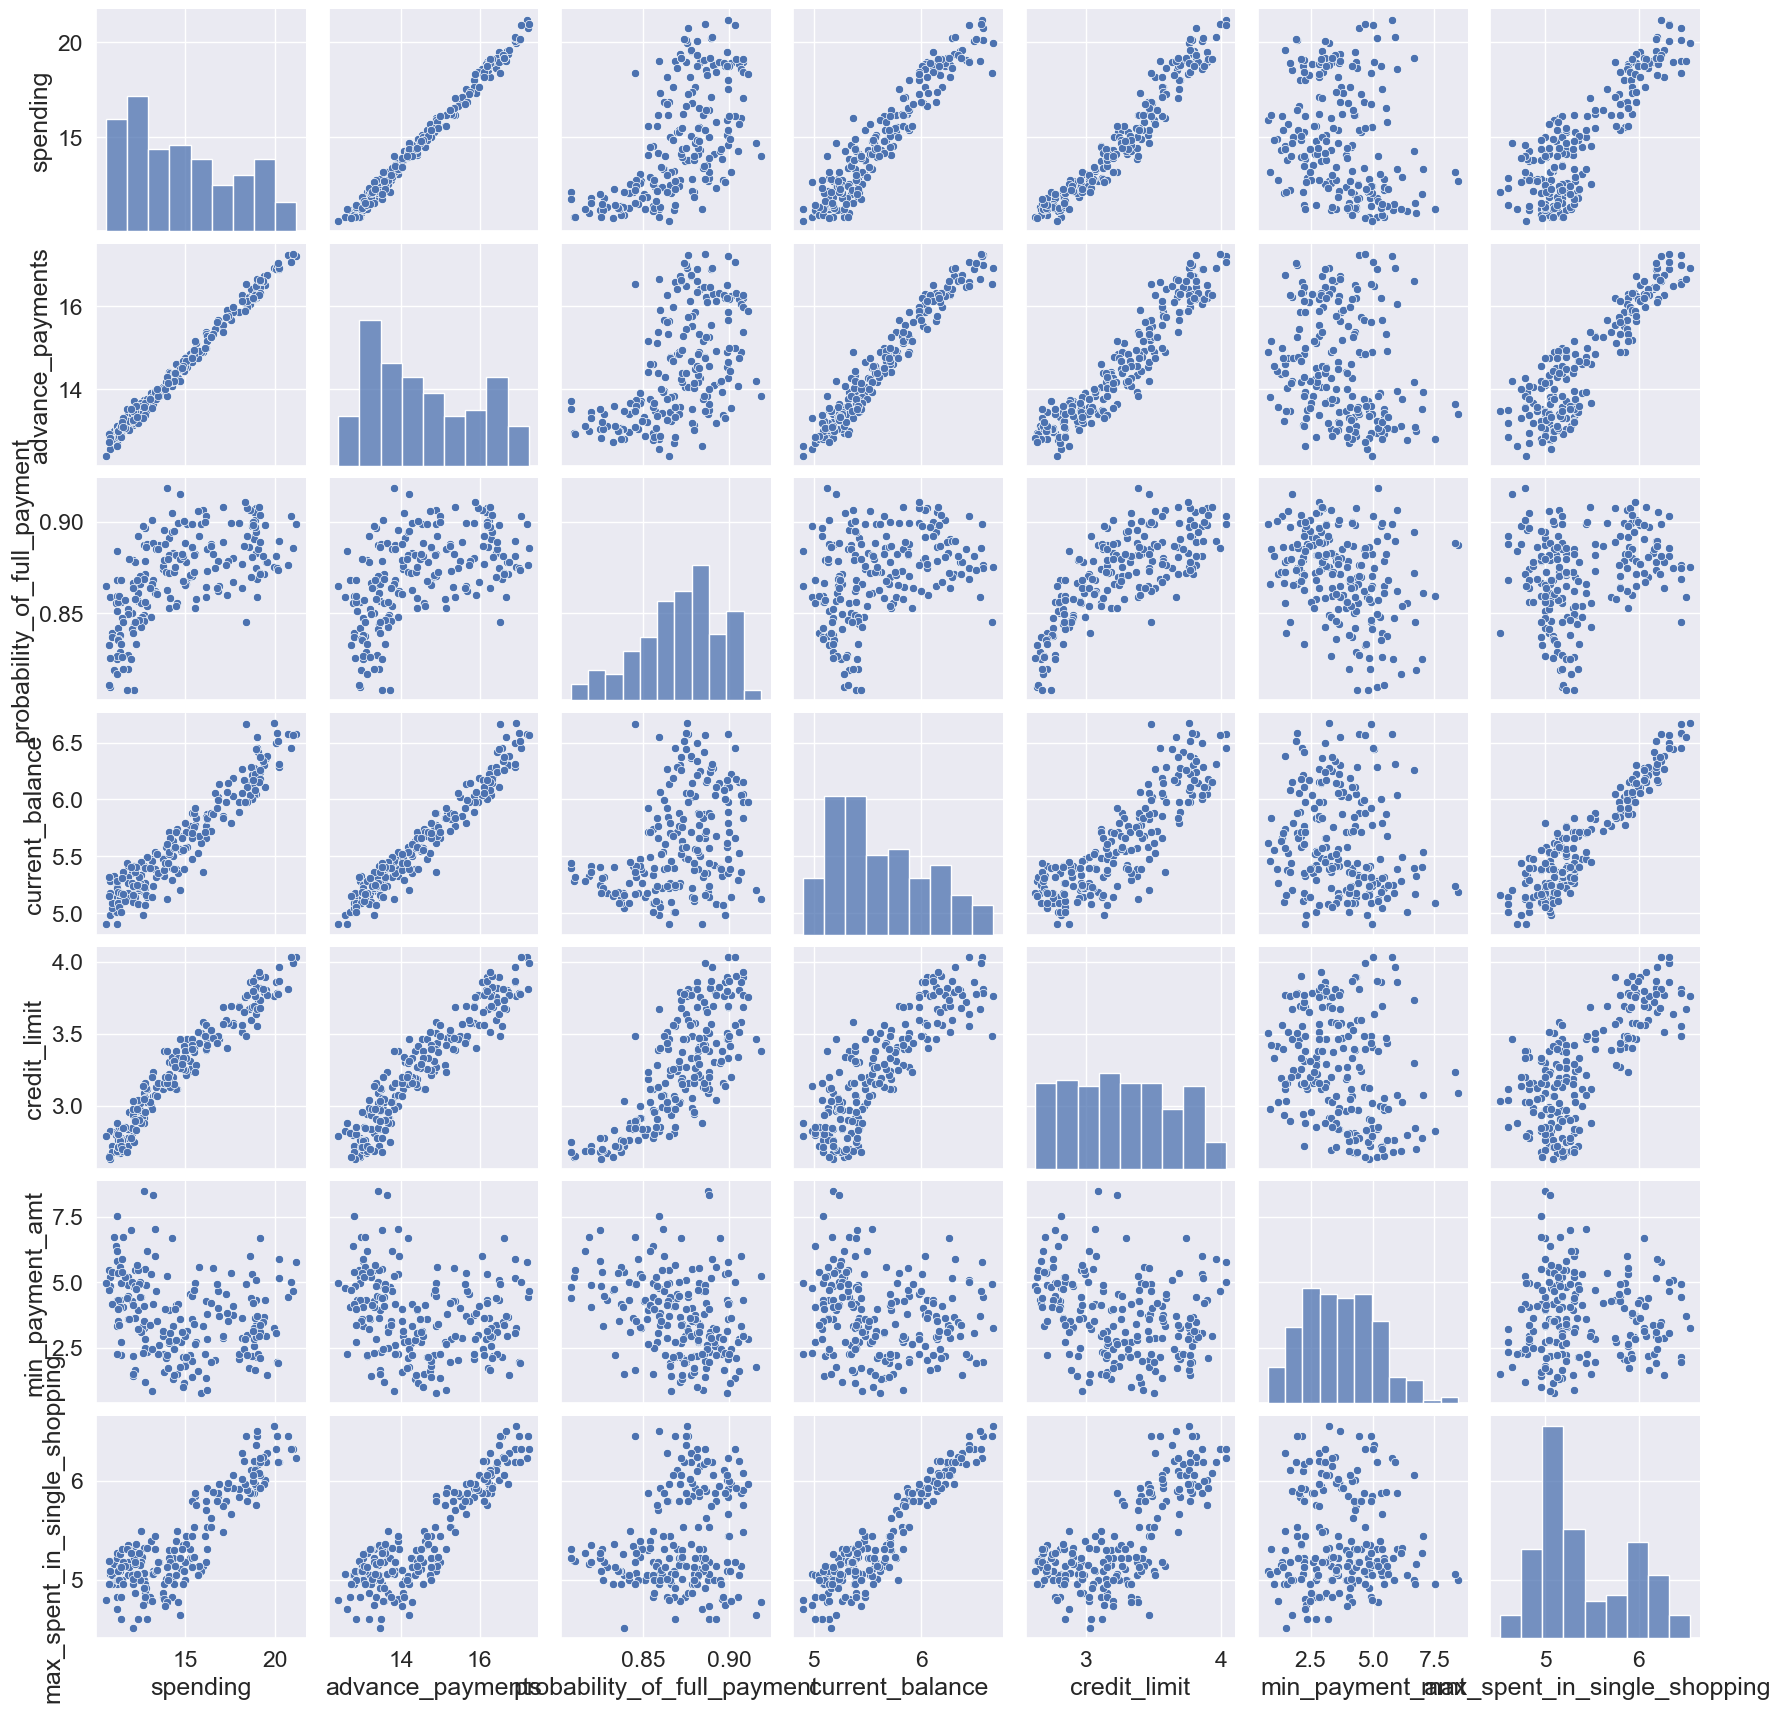

In [11]:
sns.pairplot(bank_df)
plt.show()

In [12]:
X = StandardScaler()
scaled_bank_df = X.fit_transform(bank_df)
scaled_bank_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [14]:
wardlink = linkage(scaled_bank_df, method = 'ward')

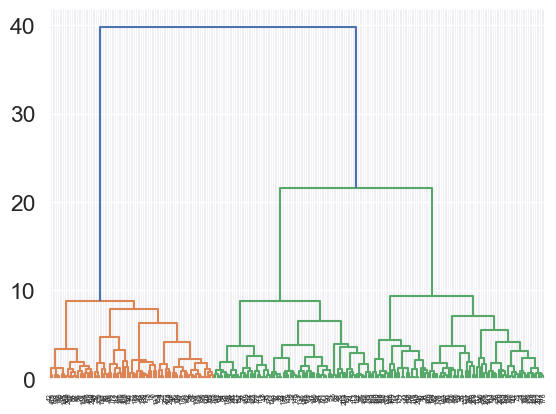

In [15]:
dend = dendrogram(wardlink)
plt.show()

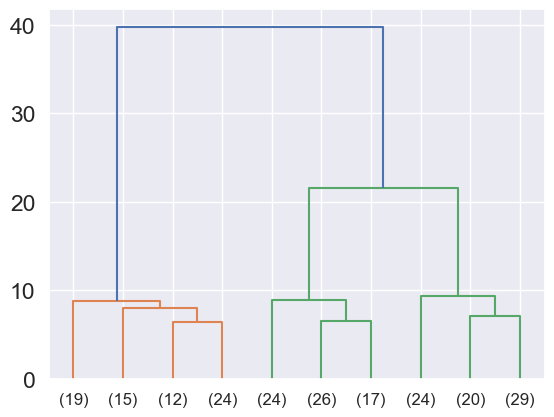

In [16]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )
plt.show()

In [17]:
from scipy.cluster.hierarchy import fcluster

In [18]:
#Method 1
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [19]:
bank_df['clusters']=clusters

In [20]:
bank_df.groupby(by=clusters).mean().set_index('clusters').T

clusters,1.0,2.0,3.0
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178


In [21]:
clusters = fcluster(wardlink,23, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [22]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_bank_df)
    wss.append(KM.inertia_)

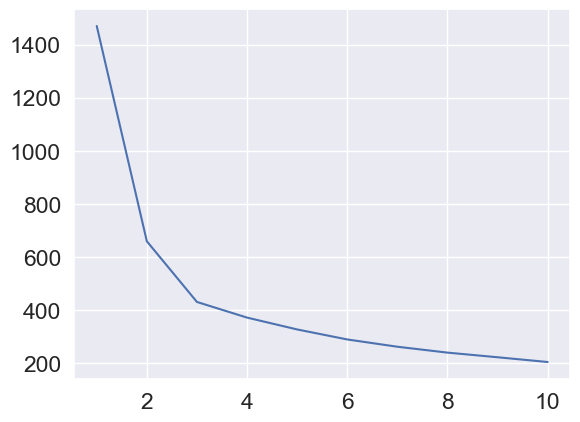

In [23]:
plt.plot(range(1,11),wss)
plt.show()

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [25]:
num_of_clusters=[2,3,4,5,6]

In [26]:
sl=[]

In [27]:
for i in num_of_clusters:
    k_means = KMeans(n_clusters = i)
    labels=k_means.fit_predict(scaled_bank_df)
    silhouette_avg=silhouette_score(scaled_bank_df,labels)
    sl.append(silhouette_avg)
    print("cluster number:",i,"silhouette average score:",silhouette_avg)

cluster number: 2 silhouette average score: 0.46577247686580914
cluster number: 3 silhouette average score: 0.40072705527512986
cluster number: 4 silhouette average score: 0.32757426605518075
cluster number: 5 silhouette average score: 0.28638162496288316
cluster number: 6 silhouette average score: 0.27752587955517594


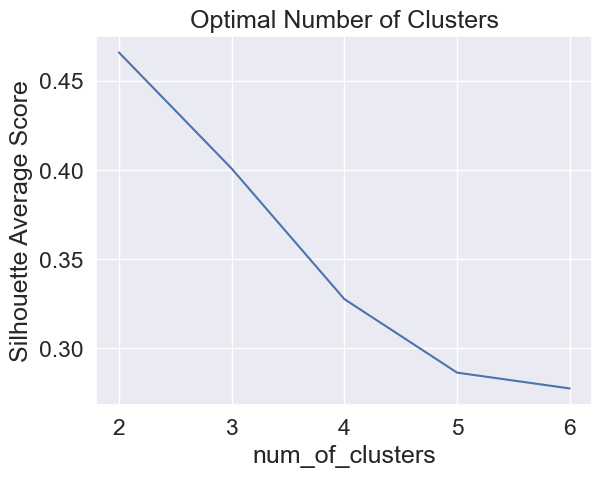

In [28]:
plt.plot(num_of_clusters,sl)
plt.xlabel("num_of_clusters")  # add X-axis label
plt.ylabel("Silhouette Average Score")  # add Y-axis label
plt.title("Optimal Number of Clusters")
plt.show()

In [29]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_bank_df)
labels = k_means.labels_

In [30]:
bank_df['clusters']=labels
bank_df['clusters'].unique()

array([1, 0, 2])

In [31]:
silhouette_score(scaled_bank_df,labels)

0.40072705527512986

In [32]:
sil_width = silhouette_samples(scaled_bank_df,labels)
silhouette_samples(scaled_bank_df,labels).min()

0.002713089347678376

In [33]:
bank_dfk=bank_df.set_index('clusters')

In [34]:
bank_dfk.groupby(by=clusters).mean().T

,1,2
spending,18.371429,13.085571
advance_payments,16.145429,13.766214
probability_of_full_payment,0.884400,0.864298
current_balance,6.158171,5.363714
credit_limit,3.684629,3.045593
min_payment_amt,3.639157,3.730723
max_spent_in_single_shopping,6.017371,5.103421


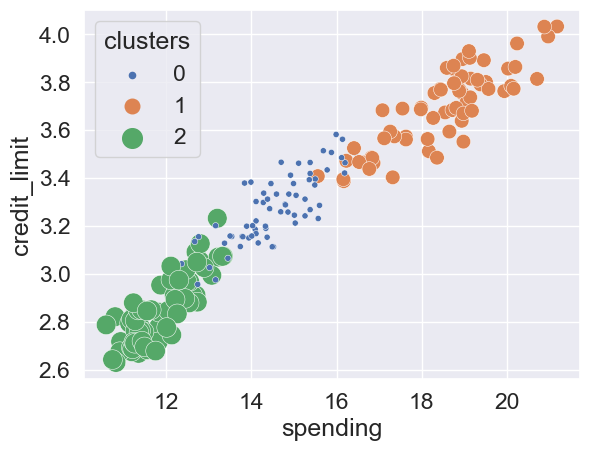

In [35]:
sns.scatterplot(data=bank_df,x='spending',y='credit_limit', hue = "clusters", size="clusters",sizes=(20, 200), legend="full", palette="deep")
plt.show()

## Loading the Data

In [36]:
df = pd.read_csv("insurance_part2_data.csv")

## Checking the data

In [37]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [39]:
# Are there any missing values ?
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

No missing values present in the data

## Summary of the data

In [40]:
df.describe(include="all")

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [41]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [42]:
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




## Check for duplicate data

In [43]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


## Removing Duplicates

In [44]:
df.drop_duplicates(inplace=True) 

In [45]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


In [46]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

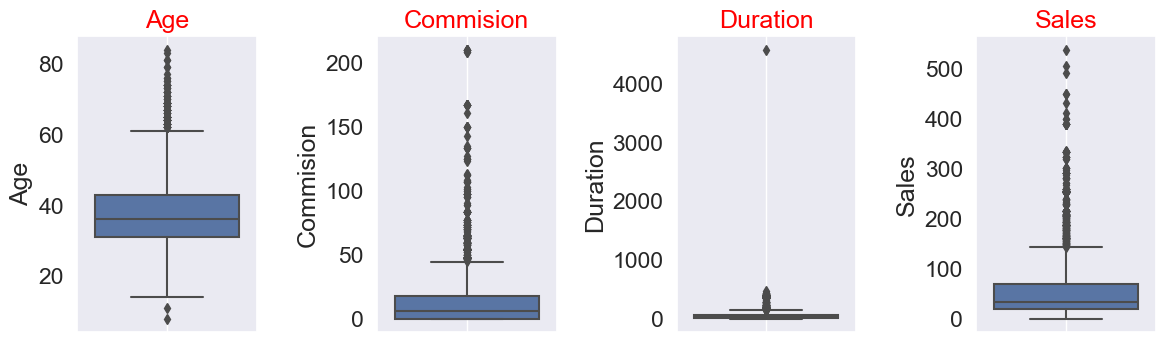

In [47]:
data_plot=df[['Age', 'Commision', 'Duration', 'Sales']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

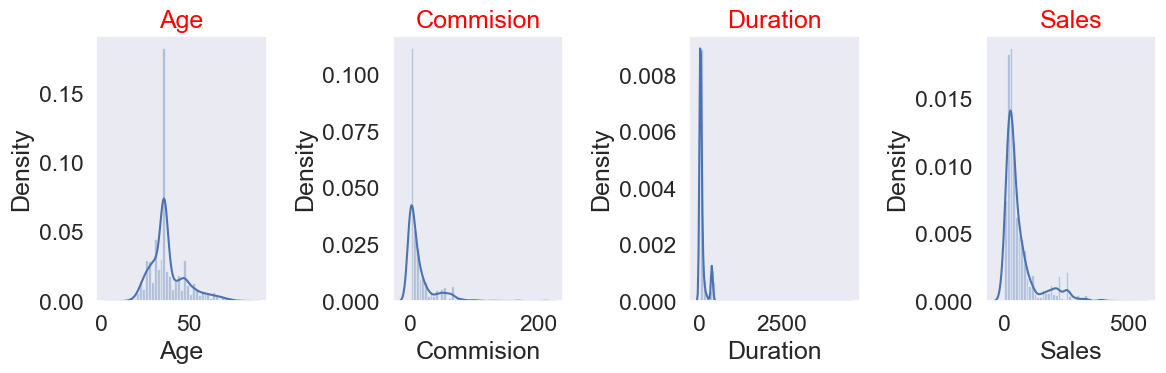

In [48]:
data_plot=df[['Age', 'Commision', 'Duration', 'Sales']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

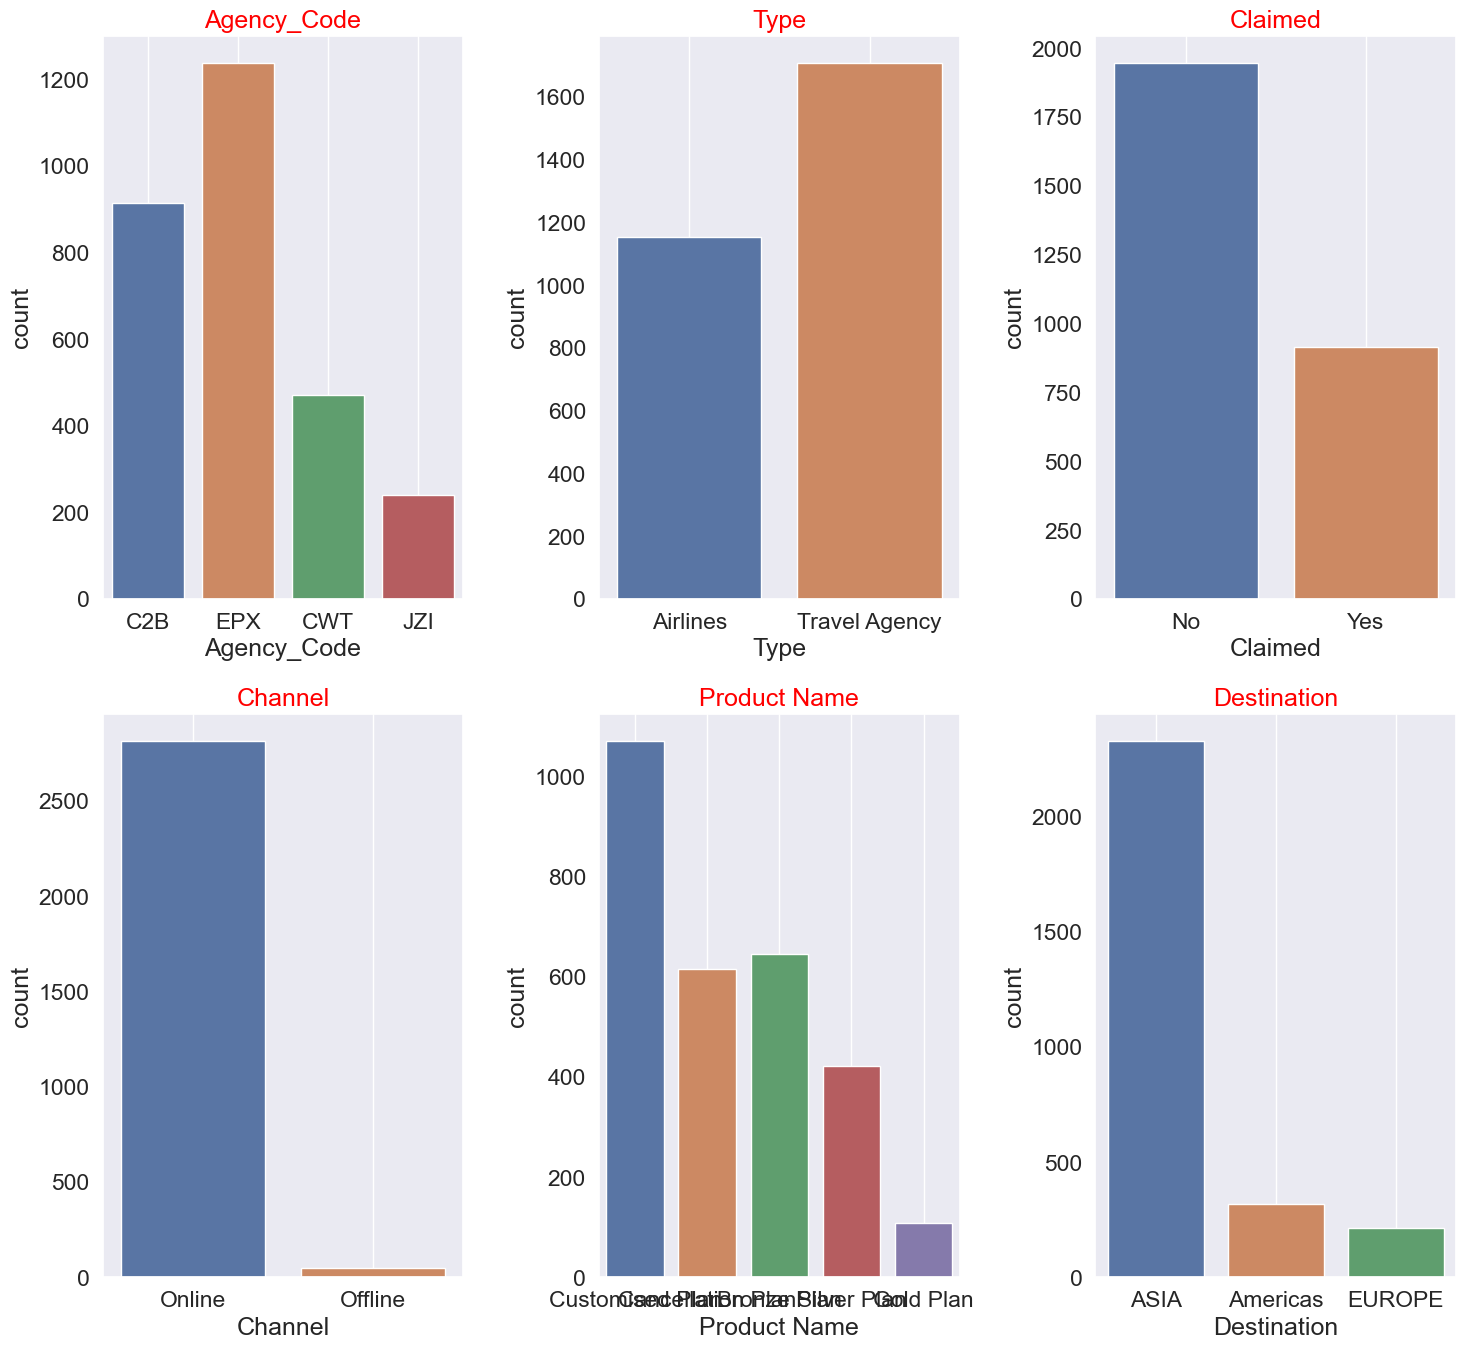

In [49]:
data_plot=df[['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']]
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

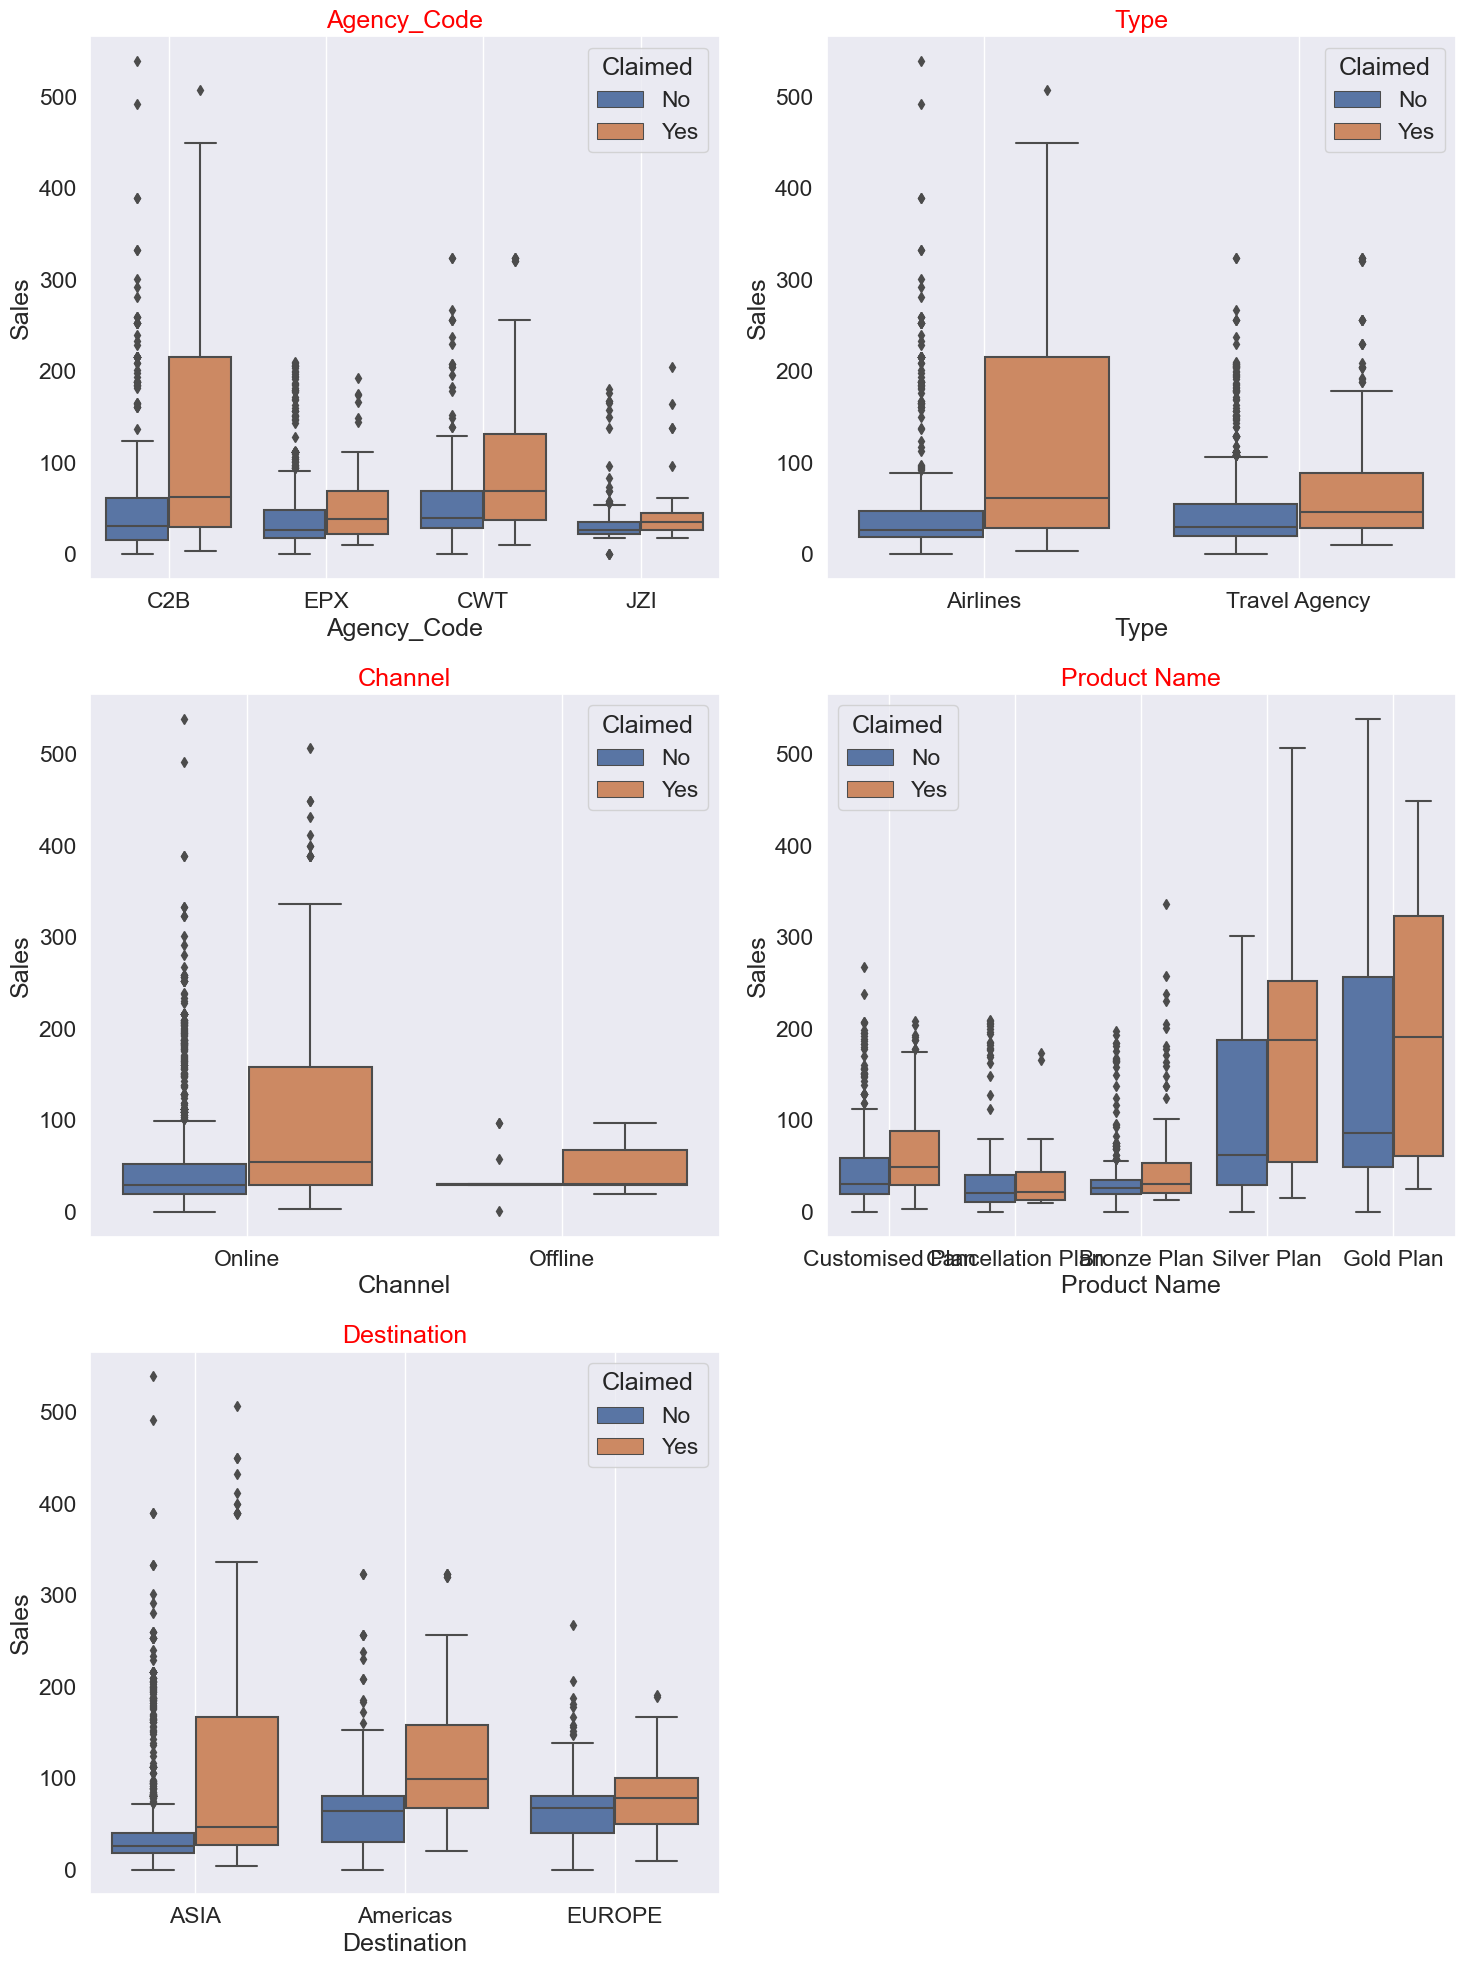

In [50]:
data_plot=df[['Agency_Code', 'Type', 'Channel', 'Product Name', 'Destination']]
fig=plt.figure(figsize=(15,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data=df,x=data_plot[data_plot.columns[i]],y='Sales',hue='Claimed')
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

## Checking for Outliers

In [51]:
df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

## Checking pairwise distribution of the continuous variables

<Figure size 1000x1000 with 0 Axes>

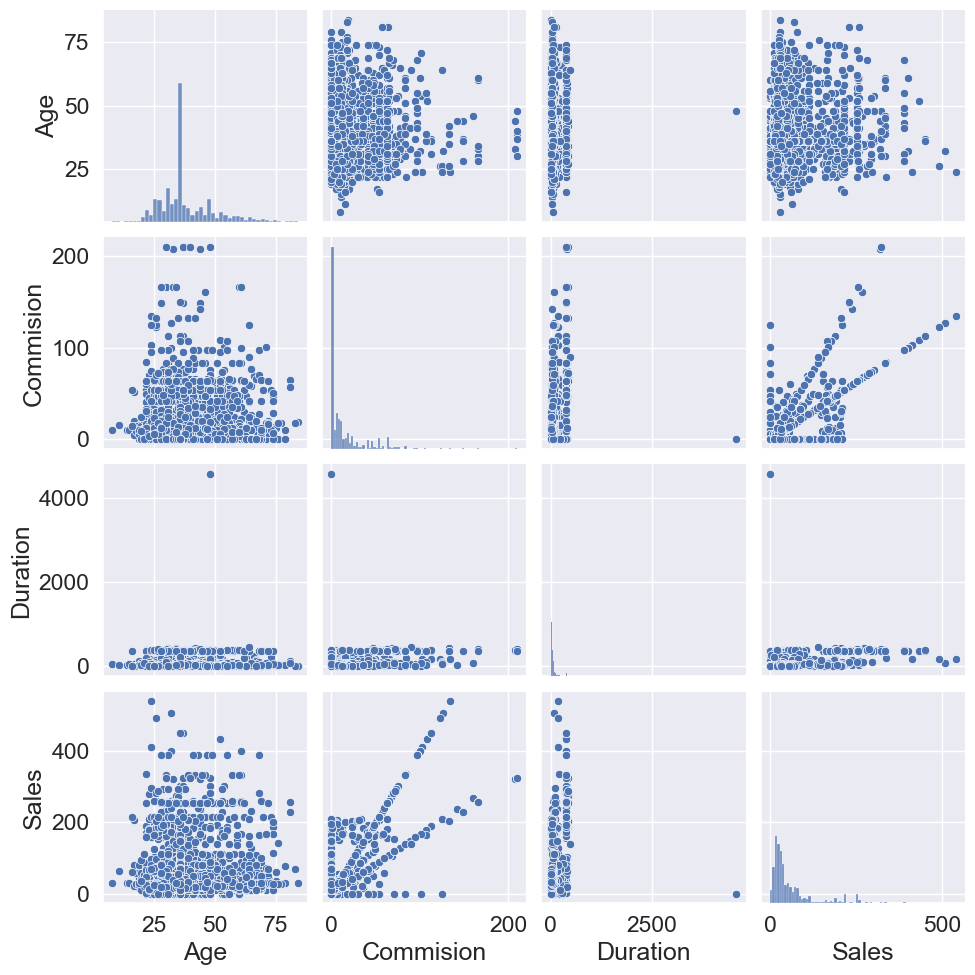

In [52]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

## Checking for Correlations

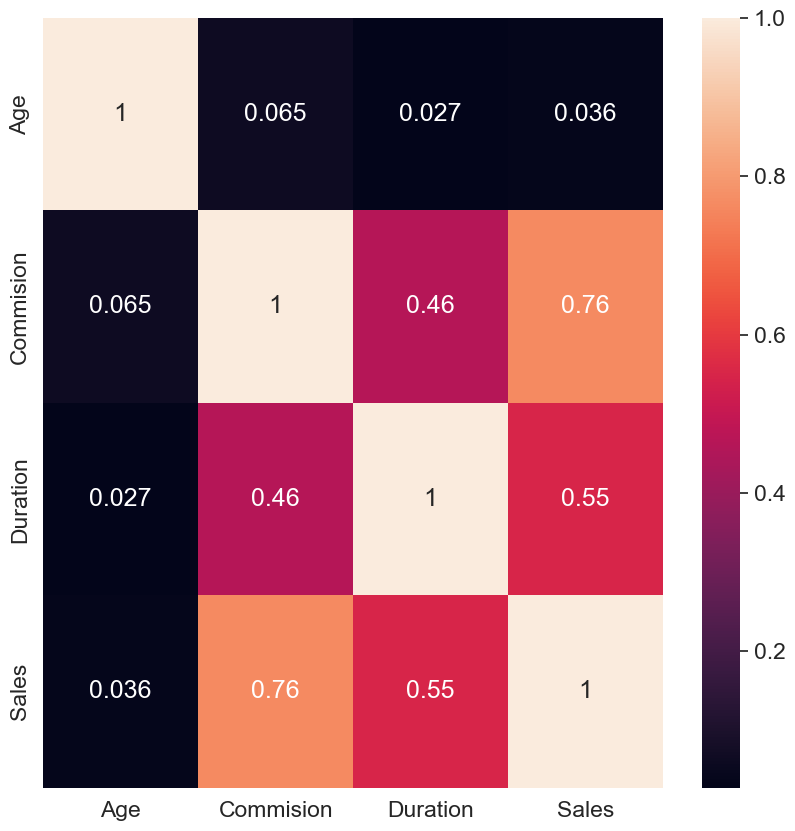

In [53]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
corre=df.corr()
sns.heatmap(corre,annot=True)
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 310.4+ KB


In [55]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [56]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


## Proportion of 1s and 0s

In [57]:
df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

## Extracting the target column into separate vectors for training set and test set

In [58]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


## Splitting data into training and test set

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

## Checking the dimensions of the training and test data

In [60]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


# Building a Decision Tree Classifier

In [61]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [62]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

## Generating Tree

In [63]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://webgraphviz.com/

## Variable Importance

In [64]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.600450
Sales         0.304966
Product Name  0.047357
Duration      0.018764
Commision     0.014732
Age           0.013731
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [65]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs

In [66]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.232975,0.767025
3,0.837500,0.162500
4,0.837500,0.162500


## Model Evaluation

### AUC and ROC for the training data

AUC: 0.810


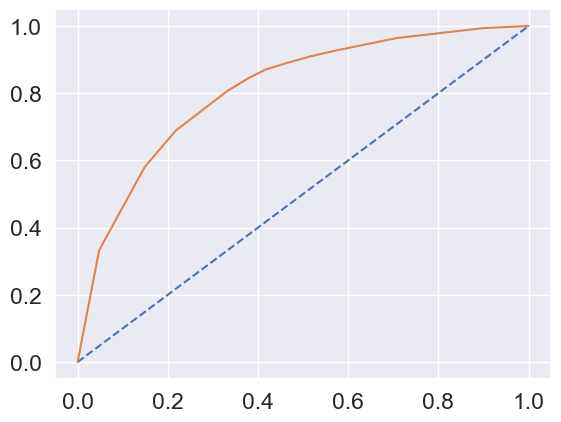

In [67]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

### AUC and ROC for the test data

AUC: 0.792


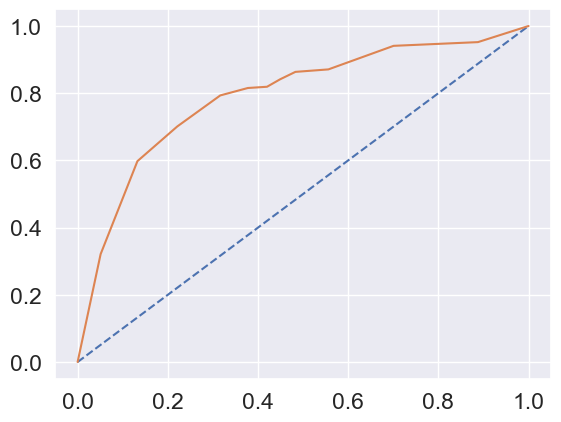

In [68]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.show()

### Confusion Matrix for the training data

In [69]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

In [70]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [71]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [72]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


### Confusion Matrix for test data

In [73]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [74]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7823050058207218

In [75]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [76]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 81%        
    Accuracy: 76%             
    Precision: 65%        
    f1-Score: 61%       
            
<b>Test Data:</b>      
    AUC: 79%      
    Accuracy: 78%         
    Precision: 68%       
    f1-Score: 63%     
  

# Building a Random Forest Classifier

### Grid Search for finding out the optimal values for the hyper parameters

In [77]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [78]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [6],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [300]})

In [79]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [80]:
best_grid = grid_search.best_estimator_

In [81]:
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

## Predicting the Training and Testing data

In [82]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## RF Model Performance Evaluation on Training data

In [83]:
confusion_matrix(train_labels,ytrain_predict)

array([[1228,  131],
       [ 258,  385]], dtype=int64)

In [84]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8056943056943057

In [85]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.75      0.60      0.66       643

    accuracy                           0.81      2002
   macro avg       0.79      0.75      0.76      2002
weighted avg       0.80      0.81      0.80      2002



In [86]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.75
rf_train_recall  0.6
rf_train_f1  0.66


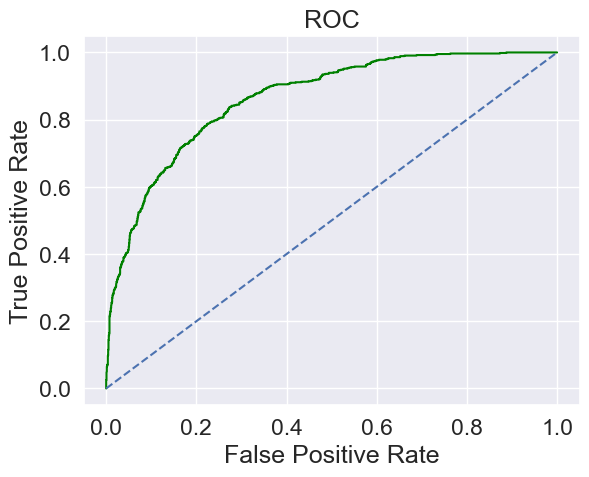

Area under Curve is 0.8639002468423744


In [87]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [88]:
confusion_matrix(test_labels,ytest_predict)

array([[522,  66],
       [118, 153]], dtype=int64)

In [89]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7857974388824214

In [90]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       588
           1       0.70      0.56      0.62       271

    accuracy                           0.79       859
   macro avg       0.76      0.73      0.74       859
weighted avg       0.78      0.79      0.78       859



In [91]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.7
rf_test_recall  0.56
rf_test_f1  0.62


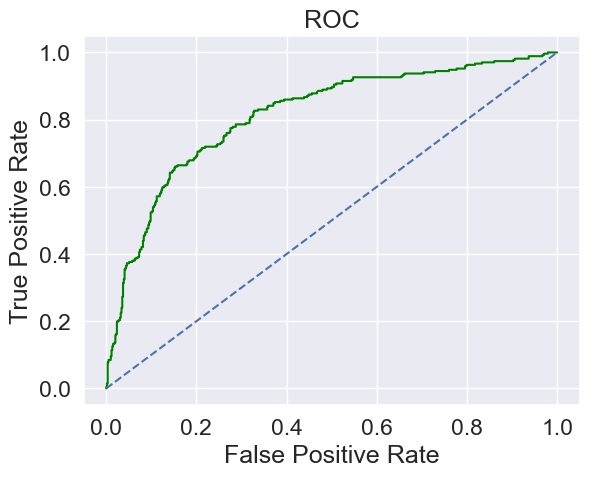

Area under Curve is 0.8136186208800863


In [92]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [93]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.325075
Sales         0.207197
Product Name  0.169962
Duration      0.101869
Commision     0.095711
Age           0.069549
Type          0.015744
Destination   0.013474
Channel       0.001419


# Random Forest Conclusion

<b>Train Data:</b>  
    AUC: 86%        
    Accuracy: 81%           
    Precision: 75%        
    f1-Score: 66%       
            
<b>Test Data:</b>      
    AUC: 81%      
    Accuracy: 79%          
    Precision: 70%       
    f1-Score: 62%     
   

# Building a Neural Network Classifier

In [94]:
param_grid = {
    'hidden_layer_sizes': [50,100], # 50, 200
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [95]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [96]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

## Predicting the Training and Testing data

In [97]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## NN Model Performance Evaluation on Training data

In [98]:
confusion_matrix(train_labels,ytrain_predict)

array([[1163,  196],
       [ 280,  363]], dtype=int64)

In [99]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7622377622377622

In [100]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1359
           1       0.65      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.73      0.71      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [101]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.65
nn_train_recall  0.56
nn_train_f1  0.6


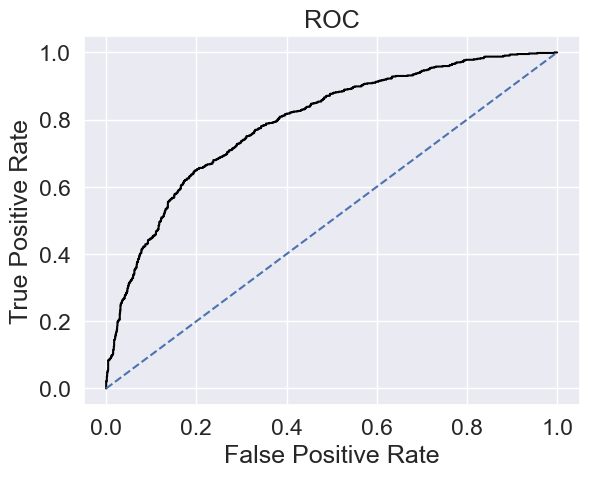

Area under Curve is 0.7920464571767961


In [102]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [103]:
confusion_matrix(test_labels,ytest_predict)

array([[510,  78],
       [118, 153]], dtype=int64)

In [104]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7718277066356228

In [105]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.56      0.61       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.72       859
weighted avg       0.76      0.77      0.77       859



In [106]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.66
nn_test_recall  0.56
nn_test_f1  0.61


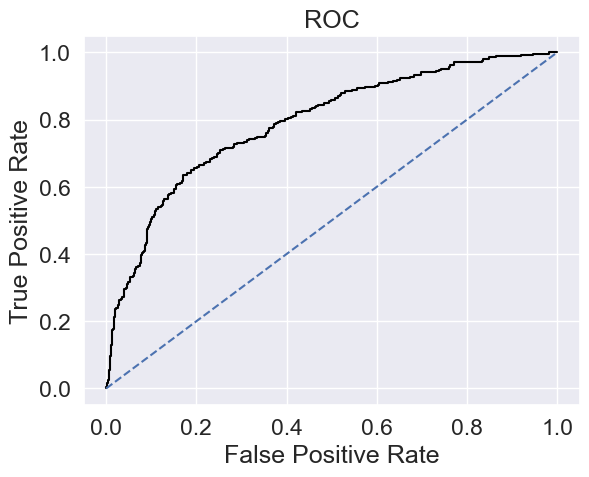

Area under Curve is 0.7911175540326832


In [107]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [108]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 79%        
    Accuracy: 76%          
    Precision: 65%        
    f1-Score: 60%     
            
<b>Test Data:</b>      
    AUC: 79%      
    Accuracy: 77%        
    Precision: 66%       
    f1-Score: 61%     .  

# Final Conclusion

## Comparison of the performance metrics from the 3 models

In [109]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.81,0.79,0.76,0.77
AUC,0.81,0.79,0.86,0.81,0.79,0.79
Recall,0.58,0.60,0.60,0.56,0.56,0.56
Precision,0.65,0.68,0.75,0.70,0.65,0.66
F1 Score,0.61,0.63,0.66,0.62,0.60,0.61


## ROC Curve for the 3 models on the Training data

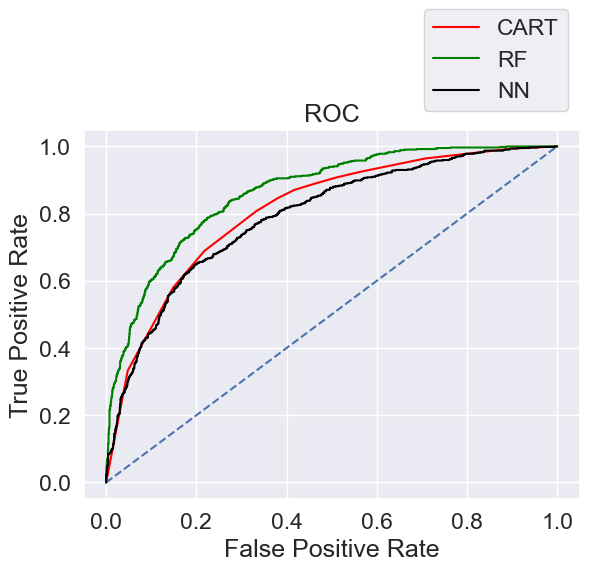

In [110]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

## ROC Curve for the 3 models on the Test data

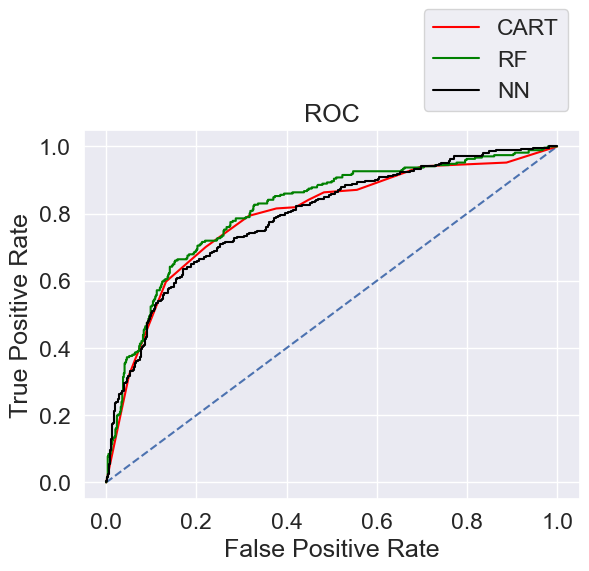

In [111]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()